In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import yfinance as yf
%matplotlib widget

In [2]:
start = dt.datetime(2021, 10, 20)

simbol = "MSFT"
ticker = yf.Ticker(simbol)
msft = ticker.history(start=start, actions=False, rounding=True)
msft.shift() # shift removes first row values

,Open,High,Low,Close,Volume
Date,,,,,
2021-10-20 00:00:00-04:00,NaN,NaN,NaN,NaN,NaN
2021-10-21 00:00:00-04:00,306.64,307.13,303.57,304.86,16537100.0
2021-10-22 00:00:00-04:00,304.62,308.44,303.82,308.18,16918100.0
2021-10-25 00:00:00-04:00,307.82,308.51,305.24,306.59,17449300.0
2021-10-26 00:00:00-04:00,306.79,306.83,303.91,305.57,17554500.0
...,...,...,...,...,...
2022-10-14 00:00:00-04:00,219.85,236.10,219.13,234.24,42551800.0
2022-10-17 00:00:00-04:00,235.54,237.24,228.34,228.56,30187200.0
2022-10-18 00:00:00-04:00,235.82,238.96,235.14,237.53,28142300.0


In [3]:
msft["RoR"]= msft.Close / msft.Close.shift()-1
msft.head()

,Open,High,Low,Close,Volume,RoR
Date,,,,,,
2021-10-20 00:00:00-04:00,306.64,307.13,303.57,304.86,16537100,NaN
2021-10-21 00:00:00-04:00,304.62,308.44,303.82,308.18,16918100,0.010890
2021-10-22 00:00:00-04:00,307.82,308.51,305.24,306.59,17449300,-0.005159
2021-10-25 00:00:00-04:00,306.79,306.83,303.91,305.57,17554500,-0.003327
2021-10-26 00:00:00-04:00,308.42,309.81,306.04,307.53,28107300,0.006414


In [4]:
msft["Change in %"] = msft["Close"].pct_change()
msft.head()

,Open,High,Low,Close,Volume,RoR,Change in %
Date,,,,,,,
2021-10-20 00:00:00-04:00,306.64,307.13,303.57,304.86,16537100,NaN,NaN
2021-10-21 00:00:00-04:00,304.62,308.44,303.82,308.18,16918100,0.010890,0.010890
2021-10-22 00:00:00-04:00,307.82,308.51,305.24,306.59,17449300,-0.005159,-0.005159
2021-10-25 00:00:00-04:00,306.79,306.83,303.91,305.57,17554500,-0.003327,-0.003327
2021-10-26 00:00:00-04:00,308.42,309.81,306.04,307.53,28107300,0.006414,0.006414


Normalization:

In [5]:
msft["Normalized"]=(msft.Close/msft.iloc[0]['Close'])*100
msft

,Open,High,Low,Close,Volume,RoR,Change in %,Normalized
Date,,,,,,,,
2021-10-20 00:00:00-04:00,306.64,307.13,303.57,304.86,16537100,NaN,NaN,100.000000
2021-10-21 00:00:00-04:00,304.62,308.44,303.82,308.18,16918100,0.010890,0.010890,101.089024
2021-10-22 00:00:00-04:00,307.82,308.51,305.24,306.59,17449300,-0.005159,-0.005159,100.567474
2021-10-25 00:00:00-04:00,306.79,306.83,303.91,305.57,17554500,-0.003327,-0.003327,100.232894
2021-10-26 00:00:00-04:00,308.42,309.81,306.04,307.53,28107300,0.006414,0.006414,100.875812
...,...,...,...,...,...,...,...,...
2022-10-14 00:00:00-04:00,235.54,237.24,228.34,228.56,30187200,-0.024249,-0.024249,74.972118
2022-10-17 00:00:00-04:00,235.82,238.96,235.14,237.53,28142300,0.039246,0.039246,77.914453
2022-10-18 00:00:00-04:00,243.24,243.93,235.37,238.50,26329600,0.004084,0.004084,78.232631


In [6]:
# Annual rate of return
msft.iloc[-1]['Close'] / msft.iloc[0]['Close']-1

-0.22538214262284328

In [7]:
# Growth factor
msft['GF'] = msft['Change in %']+1
msft['GF'].prod()-1

-0.22538214262284462

In [8]:
msft.iloc[0]['Close']*msft['GF'].prod()

236.1499999999996

In [9]:
msft.iloc[-1]["Close"]

236.15

In [10]:
len(msft)

253

In [11]:
# compound annual growth:
cagr = (msft.iloc[-1]['Close'] / msft.iloc[0]['Close'])**(1/len(msft)) - 1
cagr

-0.001008919387932572

In [12]:
(1 + cagr)**(len(msft))

0.7746178573771549

Multiple position returns:

In [13]:
start = dt.datetime(2021, 10, 20)

simbols = "MSFT AAPL COF BAC"
tickers = yf.Tickers(simbols)
data_of_multi_tickers = tickers.history(start=start, actions=False, rounding=True)
data_of_multi_tickers.head(3)

[*********************100%***********************]  4 of 4 completed


Close                           High         \
                             AAPL    BAC     COF    MSFT    AAPL    BAC   
Date                                                                      
2021-10-20 00:00:00-04:00  148.43  46.07  170.07  304.86  148.92  46.21   
2021-10-21 00:00:00-04:00  148.65  45.81  162.65  308.18  148.81  46.45   
2021-10-22 00:00:00-04:00  147.86  46.54  164.76  306.59  149.34  46.58   

                                              Low                         \
                              COF    MSFT    AAPL    BAC     COF    MSFT   
Date                                                                       
2021-10-20 00:00:00-04:00  170.28  307.13  147.29  45.05  165.17  303.57   
2021-10-21 00:00:00-04:00  171.44  308.44  147.05  45.60  162.04  303.82   
2021-10-22 00:00:00-04:00  166.32  308.51  147.81  45.97  162.59  305.24   

                             Open                           Volume            \
                             AAPL    BAC     COF    MSFT      AAPL       BAC   
Date                                                                           
2021-10-20 00:00:00-04:00  147.87  45.48  165.82  306.64  58418800  40411000   
2021-10-21 00:00:00-04:00  147.98  46.08  169.31  304.62  61421000  36848600   
2021-10-22 00:00:00-04:00  148.86  45.97  163.93  307.82  58883400  36225600   

                                              
                               COF      MSFT  
Date                                          
2021-10-20 00:00:00-04:00  2614000  16537100  
2021-10-21 00:00:00-04:00  3420600  16918100  
2021-10-22 00:00:00-04:00  2943300  17449300

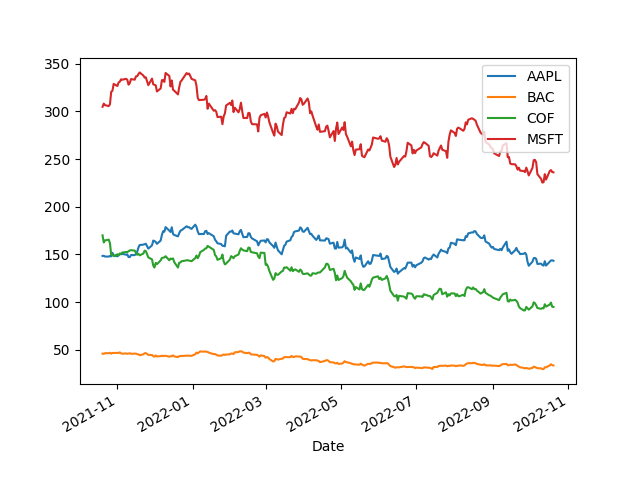

In [14]:
close_data = pd.DataFrame(data_of_multi_tickers.Close)
fig1, ax1 = plt.subplots()
close_data.plot(ax=ax1);

In [15]:
# change from first date to last date:
(close_data/close_data.iloc[0]).tail()

,AAPL,BAC,COF,MSFT
Date,,,,
2022-10-14 00:00:00-04:00,0.932291,0.688083,0.560887,0.749721
2022-10-17 00:00:00-04:00,0.959442,0.729759,0.573117,0.779145
2022-10-18 00:00:00-04:00,0.968470,0.757109,0.585582,0.782326
2022-10-19 00:00:00-04:00,0.969211,0.736271,0.559946,0.775700
2022-10-20 00:00:00-04:00,0.966045,0.731496,0.558476,0.774618


In [16]:
# one day change:
(close_data.pct_change()+1).tail()

,AAPL,BAC,COF,MSFT
Date,,,,
2022-10-14 00:00:00-04:00,0.967760,1.000316,0.975158,0.975751
2022-10-17 00:00:00-04:00,1.029123,1.060568,1.021805,1.039246
2022-10-18 00:00:00-04:00,1.009409,1.037478,1.021750,1.004084
2022-10-19 00:00:00-04:00,1.000765,0.972477,0.956221,0.991530
2022-10-20 00:00:00-04:00,0.996733,0.993514,0.997375,0.998605


In [40]:
# change from first date to last date with cumprod() function. It stacks up all data along the way down:
((close_data.pct_change()+1).cumprod()).head()

,AAPL,BAC,COF,MSFT
Date,,,,
2021-10-20 00:00:00-04:00,NaN,NaN,NaN,NaN
2021-10-21 00:00:00-04:00,1.001482,0.994356,0.956371,1.010890
2021-10-22 00:00:00-04:00,0.996160,1.010202,0.968778,1.005675
2021-10-25 00:00:00-04:00,0.995823,1.008900,0.973599,1.002329
2021-10-26 00:00:00-04:00,1.000404,1.018450,0.951491,1.008758


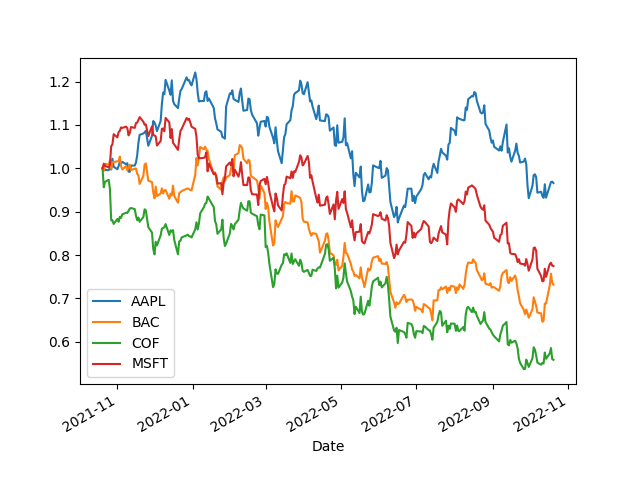

In [18]:
pct_change_data = close_data/close_data.iloc[0]
fig2, ax2 = plt.subplots()
pct_change_data.plot(ax=ax2);

Portfolio measurement:

In [26]:
aggresive_portfolio_ror = [1.1,0.2,-0.3,1.5,0.9,-0.5,0.3]
conservative_port_ror = [0.1,0.2,0.1,-0.1,0.3,0.1,-0.05]
both_portfolios = pd.DataFrame({
    'Aggr port': [1.1, 0.2, -0.3, 1.5, 0.9, -0.5, 0.3],
    'cons port': [0.1, 0.2, 0.1, -0.1, 0.3, 0.1, -0.05]
})
both_portfolios

,Aggr port,cons port
0,1.1,0.10
1,0.2,0.20
2,-0.3,0.10
3,1.5,-0.10
4,0.9,0.30
5,-0.5,0.10
6,0.3,-0.05


In [41]:
(both_portfolios+1).cumprod()

,Aggr port,cons port
0,2.10000,1.100000
1,2.52000,1.320000
2,1.76400,1.452000
3,4.41000,1.306800
4,8.37900,1.698840
5,4.18950,1.868724
6,5.44635,1.775288


In [29]:
both_portfolios.std()

Aggr port    0.739047
cons port    0.136713
dtype: float64

Stock volatility

In [35]:
msft["Log returns"]= np.log(msft.Close/msft.Close.shift())

In [36]:
msft["ATR %"]= msft["Log returns"].rolling(250).std()*(250**0.5)

In [39]:
msft.tail()

,Open,High,Low,Close,Volume,RoR,Change in %,Normalized,GF,ATR %,Log returns
Date,,,,,,,,,,,
2022-10-14 00:00:00-04:00,235.54,237.24,228.34,228.56,30187200,-0.024249,-0.024249,74.972118,0.975751,NaN,-0.024547
2022-10-17 00:00:00-04:00,235.82,238.96,235.14,237.53,28142300,0.039246,0.039246,77.914453,1.039246,NaN,0.038495
2022-10-18 00:00:00-04:00,243.24,243.93,235.37,238.50,26329600,0.004084,0.004084,78.232631,1.004084,0.321905,0.004075
2022-10-19 00:00:00-04:00,237.04,239.61,234.29,236.48,19985700,-0.008470,-0.008470,77.570032,0.991530,0.321773,-0.008506
2022-10-20 00:00:00-04:00,235.77,241.31,234.87,236.15,21748500,-0.001395,-0.001395,77.461786,0.998605,0.321747,-0.001396
